In [1]:
import artm
import os
import matplotlib.pyplot as plt

# Загружаем батчи домена golosislamacom

In [2]:
path = 'C:\\NIVC\\Nivc_BigARTM_corpus\\unary_comm\\'
subd = "golosislamacom"
batch_vectorizer = artm.BatchVectorizer(data_path=path + "\\" + subd + "\\" + "batches_pos",
                                            data_format='batches')

# Создаем модель ARTM

## Создаем объект класса модели ARTM

In [3]:
modelARTM = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(20)],
                      scores=[artm.PerplexityScore(name='PerplexityScore', use_unigram_document_model=False, dictionary=batch_vectorizer.dictionary),
                              artm.SparsityPhiScore(name='SparsityPhiScore'),
                              artm.SparsityThetaScore(name='SparsityThetaScore'),
                              artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3),
                              artm.TopTokensScore(name='TopTokensScore', num_tokens=6)], 
                      cache_theta=True)

## Добавляем в модель регуляризаторы из модельного примера для ARTM

In [4]:
modelARTM.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2))
modelARTM.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2))
modelARTM.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))

## Инициализируем модель словарем

In [5]:
modelARTM.initialize(dictionary=batch_vectorizer.dictionary)

# Обучаем модель ARTM

## Определяем параметры обучения

In [6]:
modelARTM.num_document_passes = 1

## Обучаем модель

In [16]:
modelARTM.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes = 30)

# Создаем модель PLSA

## Создаем объект класса модели PLSA

In [8]:
modelPLSA = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(15)],
                      scores=[artm.PerplexityScore(name='PerplexityScore', use_unigram_document_model=False, dictionary=batch_vectorizer.dictionary),
                              artm.SparsityPhiScore(name='SparsityPhiScore'),
                              artm.SparsityThetaScore(name='SparsityThetaScore'),
                              artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3),
                              artm.TopTokensScore(name='TopTokensScore', num_tokens=6)],
                      cache_theta=True)

## Инициализируем модель словарем

In [9]:
modelPLSA.initialize(dictionary=batch_vectorizer.dictionary)

# Обучаем модель PLSA

## Определяем параметры обучения

In [10]:
modelPLSA.num_document_passes = 5

## Обучаем модель

In [11]:
modelPLSA.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes = 15)

# Выводим параметры полученных моделей

## Значения перплексии

In [17]:
print "===========================ARTM PerplexityScore start===================================="
print modelARTM.score_tracker['PerplexityScore'].value
print "===========================ARTM PerplexityScore end======================================"
# print "===========================PLSA PerplexityScore start===================================="
# print modelPLSA.score_tracker['PerplexityScore'].value
# print "===========================PLSA PerplexityScore end======================================"

===========================ARTM PerplexityScore start====================================
[113022.07143934706, 2906.3325790715853, 2902.700463911057, 2901.9368748445204, 2900.942672696004, 2899.431713164639, 2897.0246210236137, 2893.040477209423, 2886.295229724761, 2875.0575635984906, 2857.817618682371, 2833.768567944199, 2802.647488540747, 2766.5982210786833, 2729.7105070431235, 2694.758258968772, 2661.772523507615, 2629.4152904638136, 2596.6398636349827, 2563.2444416065127, 2529.5860554640935, 2496.202402661542, 2463.5693503367397, 2431.9881837557355, 2401.672576534089, 2372.86870162429, 2345.9641449940477, 2321.437062297706, 2299.6282368398743, 2280.588448004479, 2264.0683870930197, 2249.6762039061523, 2237.0521275804385, 2225.906903896702, 2216.0360391451777, 2207.2807697821772, 2199.5171716658574, 2192.6162259734688, 2186.469801783369, 2180.990342313741, 2176.092365843451, 2171.7006432657668, 2167.748983118289, 2164.17681989647, 2160.939362312856, 2157.9973691943364, 2155.31468427

## Параметры полученной модели

In [18]:
print 'Sparsity Phi: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    # modelPLSA.score_tracker['SparsityPhiScore'].last_value,
    modelARTM.score_tracker['SparsityPhiScore'].last_value)

print 'Sparsity Theta: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    # modelPLSA.score_tracker['SparsityThetaScore'].last_value,
    modelARTM.score_tracker['SparsityThetaScore'].last_value)

print 'Kernel contrast: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    # modelPLSA.score_tracker['TopicKernelScore'].last_average_contrast,
    modelARTM.score_tracker['TopicKernelScore'].last_average_contrast)

print 'Kernel purity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    # modelPLSA.score_tracker['TopicKernelScore'].last_average_purity,
    modelARTM.score_tracker['TopicKernelScore'].last_average_purity)

print 'Perplexity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    # modelPLSA.score_tracker['PerplexityScore'].last_value,
    modelARTM.score_tracker['PerplexityScore'].last_value)

IndexError: tuple index out of range

## Строим график перплексии

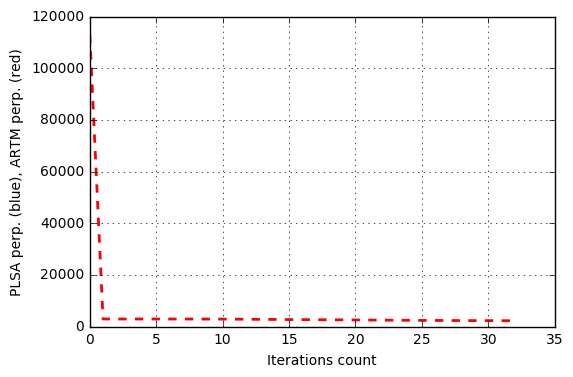

In [13]:
plt.plot(
    # xrange(modelPLSA.num_phi_updates), modelPLSA.score_tracker['PerplexityScore'].value, 'b--',
    xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA perp. (blue), ARTM perp. (red)')
plt.grid(True)
plt.show()

## Выводим графики изменения разреженностей матриц по итерациям

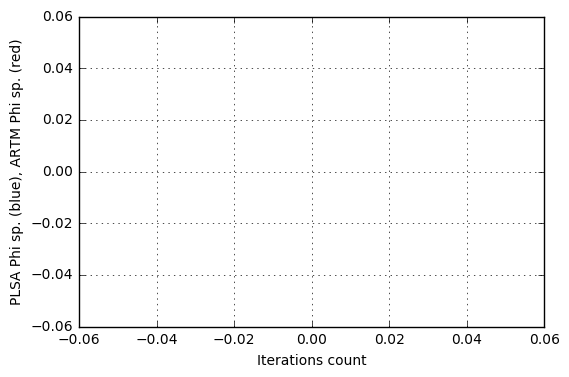

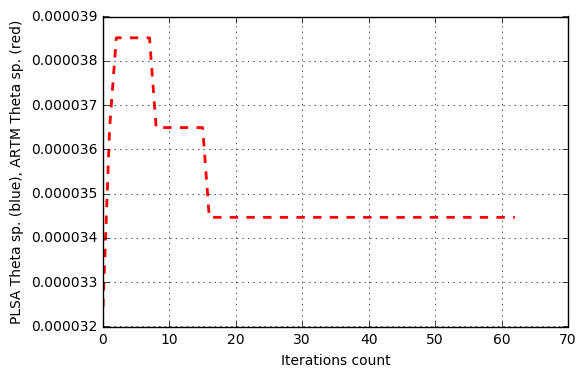

In [19]:
plt.plot(
    # xrange(modelPLSA.num_phi_updates), modelPLSA.score_tracker['SparsityPhiScore'].value, 'b--',
    xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['SparsityPhiScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA Phi sp. (blue), ARTM Phi sp. (red)')
plt.grid(True)
plt.show()

plt.plot(
    # xrange(modelPLSA.num_phi_updates), modelPLSA.score_tracker['SparsityThetaScore'].value, 'b--',
    xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['SparsityThetaScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA Theta sp. (blue), ARTM Theta sp. (red)')
plt.grid(True)
plt.show()

# Выводим топики моделей

## Модель PLSA

In [8]:
# print modelPLSA.score_tracker['PerplexityScore'].last_tokens
# for topic_name in modelPLSA.topic_names:
#     print topic_name + ': ',
#     print modelPLSA.score_tracker['TopTokensScore'].last_tokens[topic_name]

## Модель ARTM

In [21]:
print modelARTM.score_tracker['TopTokensScore'].last_tokens
for topic_name in modelARTM.topic_names:
    print topic_name + ': ',
    print modelARTM.score_tracker['TopTokensScore'].last_tokens[topic_name]

 {}
topic_0: 

KeyError: u'topic_0'

## матрица Fi

In [1]:
print modelARTM.phi_

NameError: name 'modelARTM' is not defined

## Матрица Theta